In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.4.1 ──

✔ broom        1.0.10     ✔ rsample      1.3.1 
✔ dials        1.4.2      ✔ tailor       0.1.0 
✔ infer        1.0.9      ✔ tune         2.0.1 
✔ modeldata    1.5.1      ✔ workflows    1.3.0 
✔ parsnip      1.3.3      ✔ workflowsets 1.1.1 
✔ recipes      1.3.1      ✔ yardstick    1.3.2 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() mask

In [2]:
# read data
raw_players <- read_csv("data/players.csv")
raw_sessions <- read_csv("data/sessions.csv")
raw_players
raw_sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [3]:
# wrangling
players <- raw_players
players

sessions <- raw_sessions |>
    mutate(
    start_date = str_split(start_time, " ", simplify = TRUE)[,1],
    start_time = str_split(start_time, " ", simplify = TRUE)[,2],
    end_date = str_split(end_time, " ", simplify = TRUE)[,1],
    end_time = str_split(end_time, " ", simplify = TRUE)[,2]) |>
    select(hashedEmail, start_time, start_date, end_time, end_date, everything())
sessions

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,start_date,end_time,end_date,original_start_time,original_end_time
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,18:12,30/06/2024,18:24,30/06/2024,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,23:33,17/06/2024,23:46,17/06/2024,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,17:34,25/07/2024,17:57,25/07/2024,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15:36,28/07/2024,15:57,28/07/2024,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,06:15,25/07/2024,06:22,25/07/2024,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,02:26,20/05/2024,02:45,20/05/2024,1.71617e+12,1.71617e+12


In [4]:
# summary statistics on players.csv
# not possible on sessions.csv
paste("All experiences: ", paste(unique(players$experience), collapse = ", "))
table(players$experience)
table(players$subscribe)
144/(144 + 52)*100
paste("minimum hours: ", min(players$played_hours) |> round(2))
paste("mean hours: ", mean(players$played_hours) |> round(2))
paste("maximum hours: ", max(players$played_hours) |> round(2))
#unique(players$name)
#table(players$name)
paste("All gender indentity: ", paste(unique(players$gender), collapse = ", "))
table(players$gender)
paste("minimum age: ", min(players$Age, na.rm = TRUE) |> round(2))
paste("mean age: ", mean(players$Age, na.rm = TRUE) |> round(2))
paste("maximum age: ", max(players$Age, na.rm = TRUE) |> round(2))

[1] "All experiences:  Pro, Veteran, Amateur, Regular, Beginner"


 Amateur Beginner      Pro  Regular  Veteran 
      63       35       14       36       48 


FALSE  TRUE 
   52   144 

[1] 73.46939

[1] "minimum hours:  0"

[1] "mean hours:  5.85"

[1] "maximum hours:  223.1"

[1] "All gender indentity:  Male, Female, Non-binary, Prefer not to say, Agender, Two-Spirited, Other"


          Agender            Female              Male        Non-binary 
                2                37               124                15 
            Other Prefer not to say      Two-Spirited 
                1                11                 6 

[1] "minimum age:  9"

[1] "mean age:  21.14"

[1] "maximum age:  58"

Sessions.csv (1535 rows x 5 columns)

-hashedEmail: \
	-character variable \
-hashed email to protect user credentials

-start_time \
	-categorical character variable \
	-start date + time of Minecraft session \
	-Only months from 04–09 (April to September)

-end_time- \
	-categorical character variable \
	-end date + time of Minecraft session \
	-Only months from 04–09 (April to September)

-Original_start_time \
	-quantitative character variable \
	-start time of Minecraft(?) session in Unix time.
	
-original_end_time \
	-quantitative character variable \
-end time of Minecraft(?) session in Unix time.


Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`)."
`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


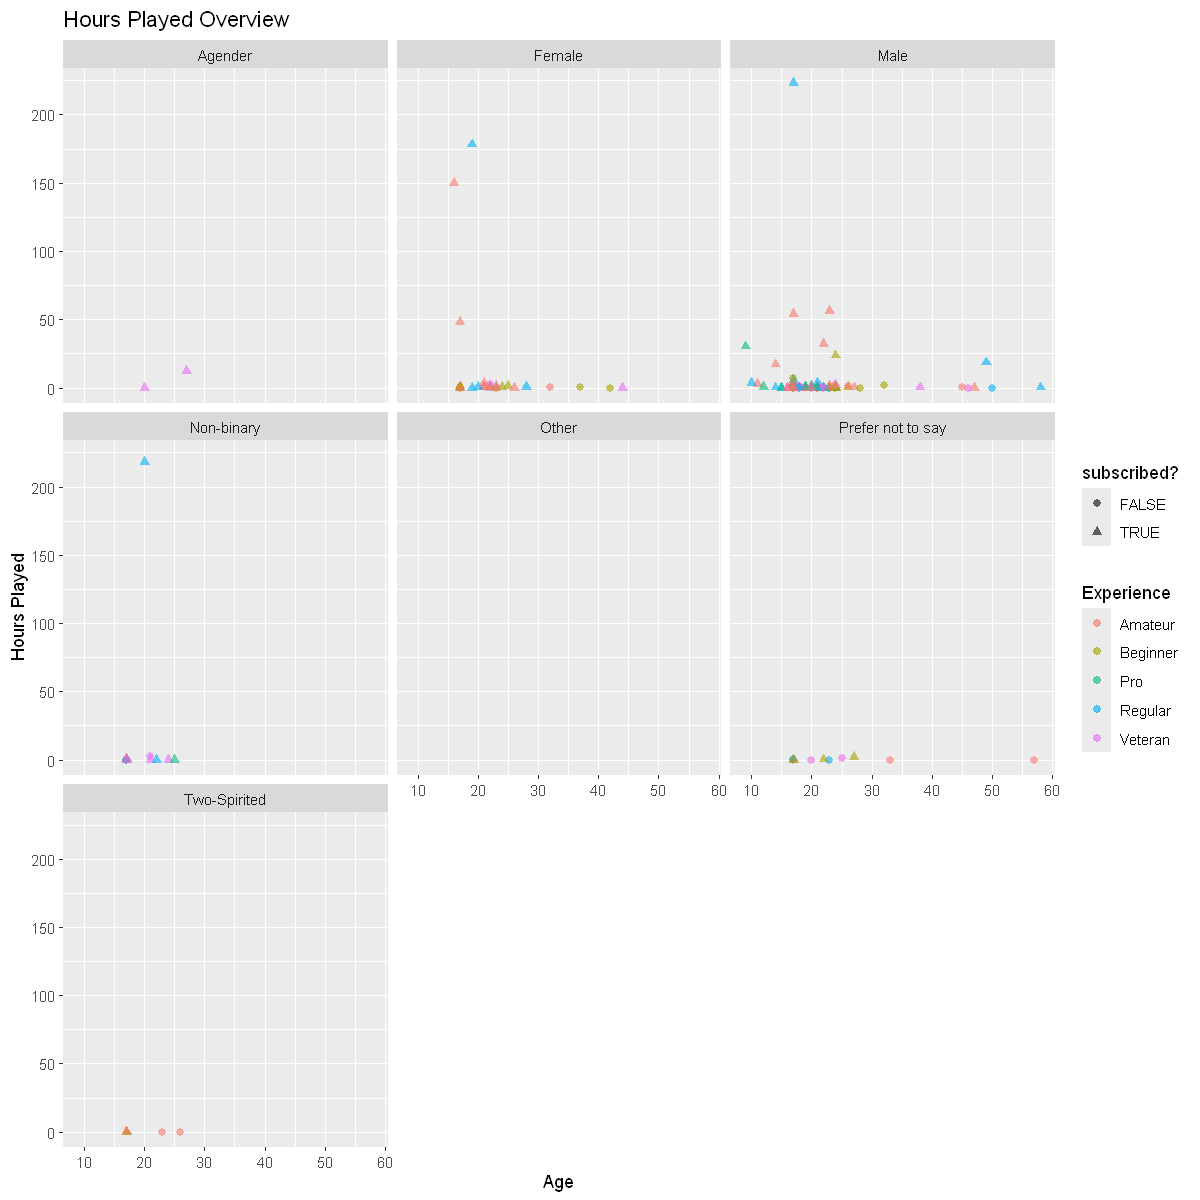

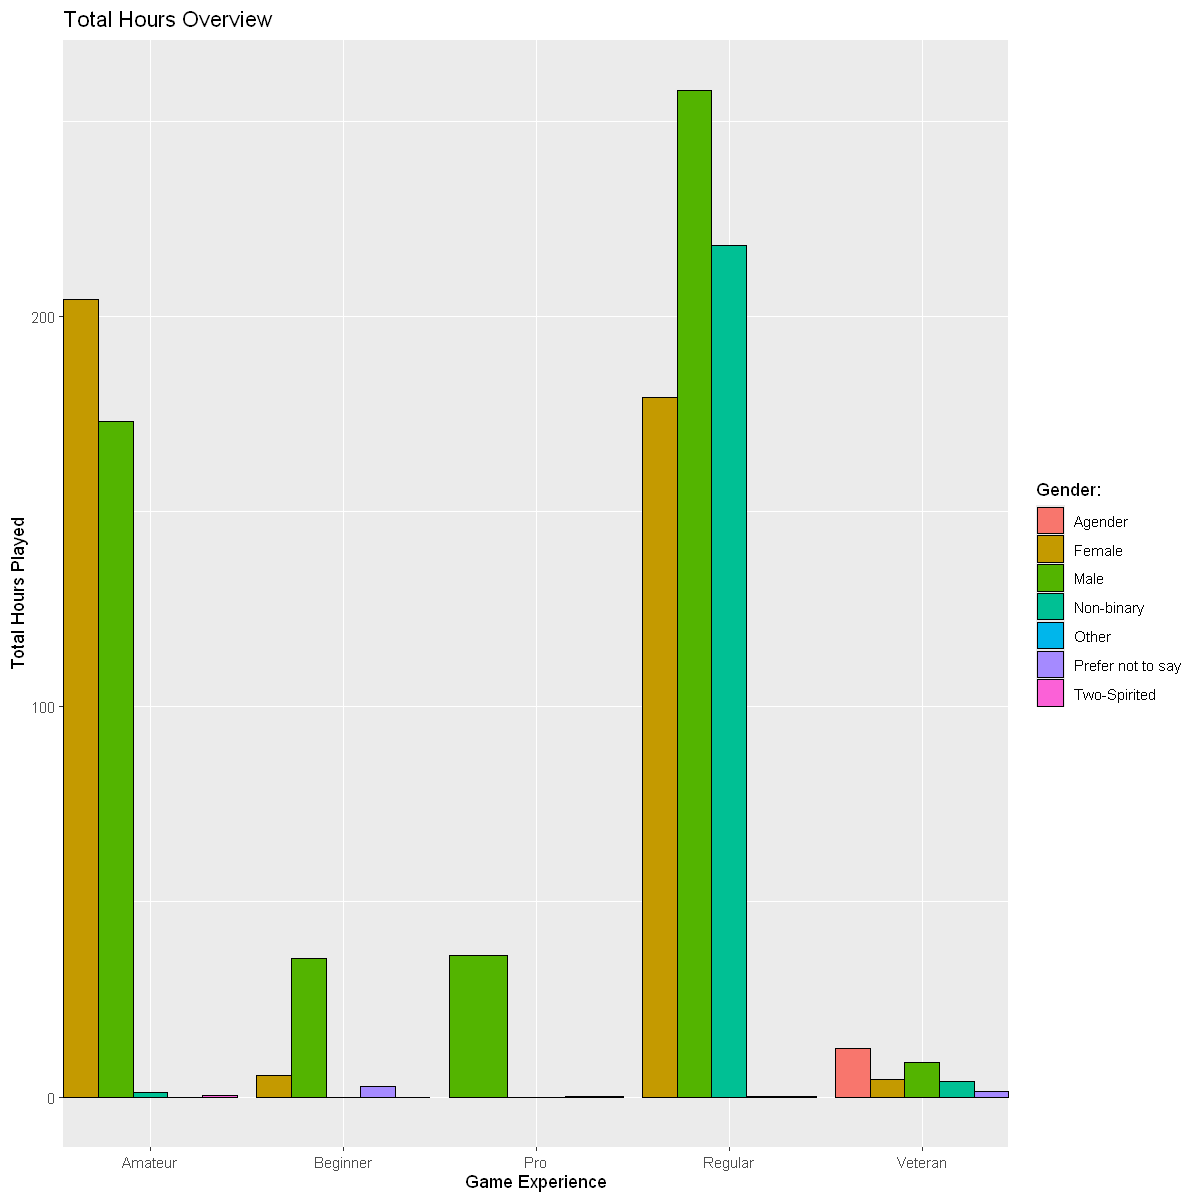

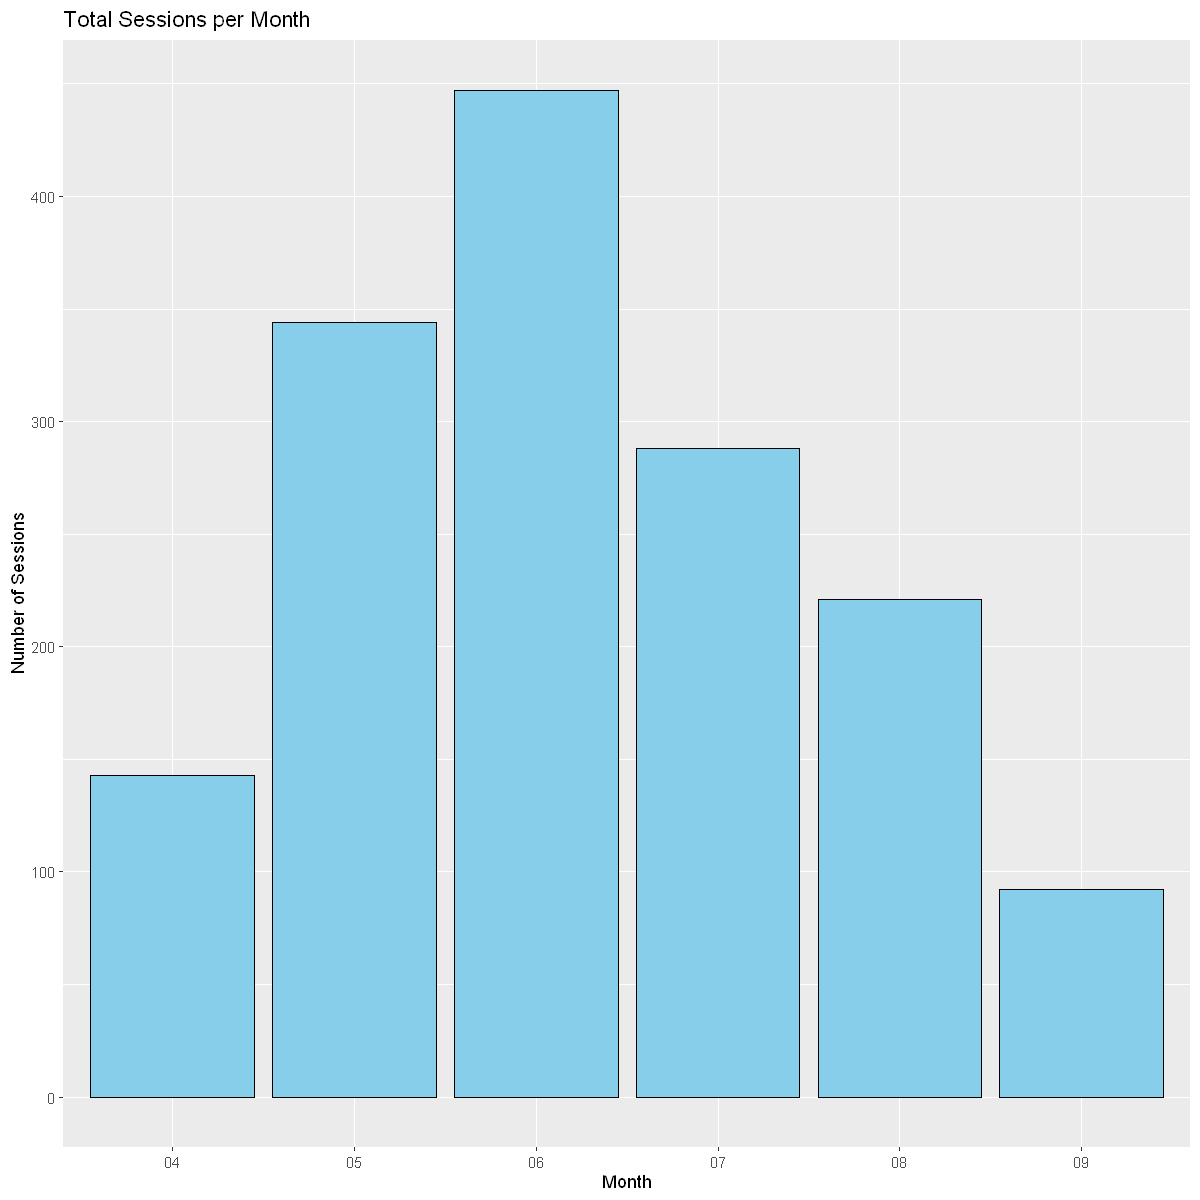

In [5]:
# plots
options(repr.plot.width = 10, repr.plot.height = 10)#

#general players.csv plot
players_plot <- players |>
    ggplot(aes(x = Age, y = played_hours, shape = subscribe, color = experience)) +
        geom_point(alpha = 0.6, size = 2) +
        facet_wrap(~ gender) +
        labs(title = "Hours Played Overview",
            x = "Age",
            y = "Hours Played",
            shape = "subscribed?",
            color = "Experience")
players_plot

players_plot_2 <- players |>
    group_by(experience, gender) |>
    summarize(total_hours = sum(played_hours)) |>
    ggplot(aes(x = experience, y = total_hours, fill = gender)) +
        geom_bar(stat = "identity", position = "dodge", color = "black") +
        labs(title = "Total Hours Overview",
            x = "Game Experience",
            y = "Total Hours Played",
            fill = "Gender:") +
        scale_x_discrete(expand = expansion(mult = 0.1))
players_plot_2

#sessions.csv plot (# of sessions per month)
sessions_num_plot <- sessions |>
    mutate(month = str_sub(start_date, 4, 5)) |>
    ggplot(aes(x = month)) +
        geom_bar(fill = "skyblue", color = "black") +
        labs(title = "Total Sessions per Month",
            x = "Month",
            y = "Number of Sessions")
sessions_num_plot


In [6]:
#ggsave("pictures/visualizations/hrsPlayedOverview_plot.png", players_plot)
#ggsave("pictures/visualizations/ttlHrsPlayed_plot.png", players_plot_2)